In [1]:
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2025-02-19 15:35:33.713612: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-19 15:35:33.795124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740000933.830383    4836 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740000933.841911    4836 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 15:35:33.915302: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Number of batches of 32 images train_ds: 250
Number of batches of 32 images validation_ds: 32
Number of batches of 32 images test_ds: 32


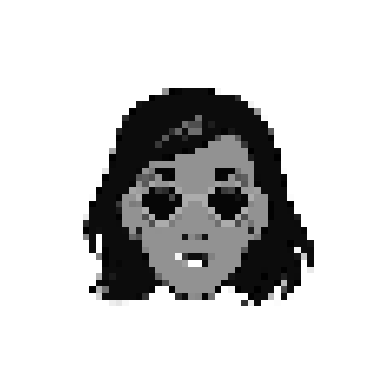

In [2]:
%run "../generacion_cartoon/data/0.1-drac-make_dataset.ipynb"
import generacion_cartoon.utils.paths as path
import notebooks.drac_CNVAE_gradient as CNVAE
import generacion_cartoon.visualization.visualize_CNVAE as visualize 
import tensorflow as tf
import time
import numpy as np

In [3]:
import tensorflow as tf

print("TensorFlow versión:", tf.__version__)
print("¿TensorFlow usa CUDA?:", tf.test.is_built_with_cuda())
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))
print("Dispositivo GPU:", tf.test.gpu_device_name())


TensorFlow versión: 2.18.0
¿TensorFlow usa CUDA?: True
GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Dispositivo GPU: /device:GPU:0


I0000 00:00:1740000939.803957    4836 gpu_device.cc:2022] Created device /device:GPU:0 with 6139 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [4]:
import tensorflow as tf
import numpy as np

# Generamos datos sintéticos
X_train = np.random.rand(100, 10).astype(np.float32)  # 100 muestras, 10 características
Y_train = np.random.rand(100, 1).astype(np.float32)   # 100 etiquetas, 1 salida

# Definimos un modelo simple
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Capa de salida
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Creamos y entrenamos el modelo
model = build_model()
model.fit(X_train, Y_train, epochs=10, batch_size=16)

/home/dracdarktime/anaconda3/envs/tensorflow-gpu/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


I0000 00:00:1740000942.491457    5483 service.cc:148] XLA service 0x7f9e20009200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740000942.491568    5483 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-02-19 15:35:42.510046: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740000942.593578    5483 cuda_dnn.cc:529] Loaded cuDNN version 90700


1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.6102 - mae: 0.7462

I0000 00:00:1740000943.060016    5483 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 0.6131 - mae: 0.7235
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2329 - mae: 0.3946 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1031 - mae: 0.2656 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1080 - mae: 0.2735 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1179 - mae: 0.2854 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1040 - mae: 0.2787 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0908 - mae: 0.2546 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0998 - mae: 0.2638 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0930 - mae: 0.2570 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0920 - mae: 0.2581 


In [26]:
import mlflow
import dagshub

In [27]:
params ={'latent_dim':90,
 'epochs':500,
 'epsilon':0.001,
 'alpha':1.0, #reconstruction_loss
 'beta':0.1,  #grad_decoded_loss
 'gamma':1.0} #center_loss


model = CNVAE.CNVAE(latent_dim=params['latent_dim'], alpha=params['alpha'],beta=params['beta'],gamma=params['gamma'])

In [28]:
name_model = f'model_FCNVAE__dim{params["latent_dim"]}_epocs={params["epochs"]}_epsilon={params["epsilon"]}_alpha={params["alpha"]}_beta={params["beta"]}_gamma={params["gamma"]}.weights.h5'
path_models = path.models_dir(name_model)

In [29]:
dagshub.init(repo_owner='DRACDARKTIME', repo_name='VA_cartoon', mlflow=True)
mlflow.set_experiment("FCNVAE_dim_alpha_beta_gamma")
mlflow.start_run()
mlflow.log_params(params)

optimizer = tf.keras.optimizers.Adam(params['epsilon'])
model.build(input_shape=(None, 56, 56, 1))
model.compile(params=params,
                    train_ds = train_ds,
                    test_ds=test_ds,
                    patience=100,
                    optimizer=optimizer,
                    path_models=path_models)

mlflow.tensorflow.log_model(model, 'model')        
mlflow.end_run()
name_gif = f'grid_CNVAE_epochs={params["epochs"]}_epsilon{params["epsilon"]}_alpha={params["alpha"]}_beta{params["beta"]}_gamma{params["gamma"]}.gif'
#visualize.create_gif(name_gif=name_gif, path_save_gif=path.data_created_dir('cnvae'))


Accessing as DRACDARKTIME

Initialized MLflow to track repo "DRACDARKTIME/VA_cartoon"

Repository DRACDARKTIME/VA_cartoon initialized!

2025-02-18 17:38:44.822777: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-02-18 17:38:45.809003: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Best model saved with best ELBO: 532.99 in epoch: 1
Epoch: 1, total_loss_train: 646.85, recons_loss_train: 628.07, grad_loss_train: 83.88, center_loss_train: 10.39
Epoch: 1, Test total_loss: 532.99, recons_loss: 518.74, grad_loss: 93.36, center_loss: 4.91, time_epoch: 19.07


2025-02-18 17:39:05.494482: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Best model saved with best ELBO: 485.00 in epoch: 2
Epoch: 2, total_loss_train: 513.47, recons_loss_train: 499.39, grad_loss_train: 93.71, center_loss_train: 4.71
Epoch: 2, Test total_loss: 485.00, recons_loss: 470.75, grad_loss: 93.76, center_loss: 4.88, time_epoch: 17.86
Best model saved with best ELBO: 468.76 in epoch: 3
Epoch: 3, total_loss_train: 479.61, recons_loss_train: 465.49, grad_loss_train: 92.34, center_loss_train: 4.88
Epoch: 3, Test total_loss: 468.76, recons_loss: 455.17, grad_loss: 89.52, center_loss: 4.64, time_epoch: 17.97


2025-02-18 17:39:45.563296: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Best model saved with best ELBO: 459.16 in epoch: 4
Epoch: 4, total_loss_train: 467.16, recons_loss_train: 453.38, grad_loss_train: 88.69, center_loss_train: 4.92
Epoch: 4, Test total_loss: 459.16, recons_loss: 445.91, grad_loss: 85.05, center_loss: 4.75, time_epoch: 18.52
Best model saved with best ELBO: 453.72 in epoch: 5
Epoch: 5, total_loss_train: 459.07, recons_loss_train: 445.51, grad_loss_train: 85.86, center_loss_train: 4.97
Epoch: 5, Test total_loss: 453.72, recons_loss: 440.57, grad_loss: 84.48, center_loss: 4.70, time_epoch: 18.85
Best model saved with best ELBO: 448.60 in epoch: 6
Epoch: 6, total_loss_train: 453.57, recons_loss_train: 440.17, grad_loss_train: 85.02, center_loss_train: 4.90
Epoch: 6, Test total_loss: 448.60, recons_loss: 435.44, grad_loss: 84.80, center_loss: 4.68, time_epoch: 20.07
Best model saved with best ELBO: 442.99 in epoch: 7
Epoch: 7, total_loss_train: 449.97, recons_loss_train: 436.75, grad_loss_train: 84.62, center_loss_train: 4.76
Epoch: 7, Test 

2025-02-18 17:41:15.369229: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Best model saved with best ELBO: 442.82 in epoch: 8
Epoch: 8, total_loss_train: 446.58, recons_loss_train: 433.48, grad_loss_train: 84.12, center_loss_train: 4.69
Epoch: 8, Test total_loss: 442.82, recons_loss: 429.99, grad_loss: 84.64, center_loss: 4.37, time_epoch: 19.47
Best model saved with best ELBO: 438.05 in epoch: 9
Epoch: 9, total_loss_train: 443.61, recons_loss_train: 430.59, grad_loss_train: 83.86, center_loss_train: 4.63
Epoch: 9, Test total_loss: 438.05, recons_loss: 425.37, grad_loss: 82.63, center_loss: 4.41, time_epoch: 19.42
Best model saved with best ELBO: 436.40 in epoch: 10
Epoch: 10, total_loss_train: 441.65, recons_loss_train: 428.71, grad_loss_train: 83.98, center_loss_train: 4.54
Epoch: 10, Test total_loss: 436.40, recons_loss: 423.78, grad_loss: 82.65, center_loss: 4.36, time_epoch: 18.98
Best model saved with best ELBO: 435.51 in epoch: 11
Epoch: 11, total_loss_train: 439.85, recons_loss_train: 426.99, grad_loss_train: 83.75, center_loss_train: 4.48
Epoch: 11,

2025-02-18 17:44:07.101811: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 16, total_loss_train: 434.37, recons_loss_train: 421.83, grad_loss_train: 83.35, center_loss_train: 4.20
Epoch: 16, Test total_loss: 430.92, recons_loss: 418.63, grad_loss: 82.85, center_loss: 4.01, time_epoch: 19.01
Best model saved with best ELBO: 429.33 in epoch: 17
Epoch: 17, total_loss_train: 433.59, recons_loss_train: 421.12, grad_loss_train: 82.98, center_loss_train: 4.17
Epoch: 17, Test total_loss: 429.33, recons_loss: 417.26, grad_loss: 81.89, center_loss: 3.88, time_epoch: 19.09
Epoch: 18, total_loss_train: 432.92, recons_loss_train: 420.51, grad_loss_train: 82.58, center_loss_train: 4.16
Epoch: 18, Test total_loss: 429.37, recons_loss: 417.39, grad_loss: 81.71, center_loss: 3.80, time_epoch: 18.87
Best model saved with best ELBO: 428.17 in epoch: 19
Epoch: 19, total_loss_train: 432.54, recons_loss_train: 420.19, grad_loss_train: 82.43, center_loss_train: 4.11
Epoch: 19, Test total_loss: 428.17, recons_loss: 416.28, grad_loss: 80.00, center_loss: 3.89, time_epoch: 18.8

2025-02-18 17:49:38.335379: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 32, total_loss_train: 428.82, recons_loss_train: 416.74, grad_loss_train: 81.26, center_loss_train: 3.95
Epoch: 32, Test total_loss: 425.30, recons_loss: 413.29, grad_loss: 80.19, center_loss: 3.98, time_epoch: 19.90
Best model saved with best ELBO: 424.27 in epoch: 33
Epoch: 33, total_loss_train: 428.85, recons_loss_train: 416.77, grad_loss_train: 81.53, center_loss_train: 3.92
Epoch: 33, Test total_loss: 424.27, recons_loss: 412.44, grad_loss: 80.37, center_loss: 3.79, time_epoch: 17.92
Epoch: 34, total_loss_train: 428.76, recons_loss_train: 416.69, grad_loss_train: 81.36, center_loss_train: 3.93
Epoch: 34, Test total_loss: 424.36, recons_loss: 412.52, grad_loss: 81.99, center_loss: 3.64, time_epoch: 17.69
Epoch: 35, total_loss_train: 428.68, recons_loss_train: 416.62, grad_loss_train: 81.38, center_loss_train: 3.93
Epoch: 35, Test total_loss: 425.18, recons_loss: 413.36, grad_loss: 83.37, center_loss: 3.47, time_epoch: 18.28
Epoch: 36, total_loss_train: 428.31, recons_loss_tr

2025-02-18 18:00:16.944273: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Best model saved with best ELBO: 421.81 in epoch: 64
Epoch: 64, total_loss_train: 425.59, recons_loss_train: 413.86, grad_loss_train: 78.46, center_loss_train: 3.89
Epoch: 64, Test total_loss: 421.81, recons_loss: 410.09, grad_loss: 80.16, center_loss: 3.70, time_epoch: 17.81
Best model saved with best ELBO: 421.69 in epoch: 65
Epoch: 65, total_loss_train: 425.60, recons_loss_train: 413.85, grad_loss_train: 78.86, center_loss_train: 3.86
Epoch: 65, Test total_loss: 421.69, recons_loss: 410.01, grad_loss: 79.81, center_loss: 3.70, time_epoch: 17.81
Epoch: 66, total_loss_train: 425.62, recons_loss_train: 413.90, grad_loss_train: 78.71, center_loss_train: 3.85
Epoch: 66, Test total_loss: 422.26, recons_loss: 410.39, grad_loss: 82.40, center_loss: 3.63, time_epoch: 17.85
Epoch: 67, total_loss_train: 425.85, recons_loss_train: 414.10, grad_loss_train: 79.20, center_loss_train: 3.83
Epoch: 67, Test total_loss: 423.49, recons_loss: 411.63, grad_loss: 80.89, center_loss: 3.77, time_epoch: 17.8

2025-02-18 18:21:48.473858: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 128, total_loss_train: 424.50, recons_loss_train: 412.92, grad_loss_train: 78.10, center_loss_train: 3.77
Epoch: 128, Test total_loss: 423.92, recons_loss: 411.96, grad_loss: 82.64, center_loss: 3.69, time_epoch: 17.96
Epoch: 129, total_loss_train: 432.19, recons_loss_train: 419.91, grad_loss_train: 85.68, center_loss_train: 3.72
Epoch: 129, Test total_loss: 421.84, recons_loss: 410.02, grad_loss: 81.29, center_loss: 3.69, time_epoch: 19.07
Epoch: 130, total_loss_train: 424.76, recons_loss_train: 413.18, grad_loss_train: 76.42, center_loss_train: 3.94
Epoch: 130, Test total_loss: 420.96, recons_loss: 409.40, grad_loss: 78.74, center_loss: 3.69, time_epoch: 18.53
Epoch: 131, total_loss_train: 424.44, recons_loss_train: 412.87, grad_loss_train: 76.48, center_loss_train: 3.92
Epoch: 131, Test total_loss: 420.45, recons_loss: 408.99, grad_loss: 77.68, center_loss: 3.69, time_epoch: 18.53
Best model saved with best ELBO: 420.24 in epoch: 132
Epoch: 132, total_loss_train: 424.22, reco

2025-02-18 19:03:00.778525: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 256, total_loss_train: 423.11, recons_loss_train: 411.80, grad_loss_train: 75.99, center_loss_train: 3.71
Epoch: 256, Test total_loss: 419.01, recons_loss: 407.71, grad_loss: 77.89, center_loss: 3.52, time_epoch: 17.80
Epoch: 257, total_loss_train: 423.54, recons_loss_train: 412.18, grad_loss_train: 76.50, center_loss_train: 3.72
Epoch: 257, Test total_loss: 419.06, recons_loss: 407.80, grad_loss: 77.46, center_loss: 3.51, time_epoch: 17.40
Epoch: 258, total_loss_train: 423.15, recons_loss_train: 411.85, grad_loss_train: 75.68, center_loss_train: 3.73
Epoch: 258, Test total_loss: 419.13, recons_loss: 407.88, grad_loss: 76.79, center_loss: 3.57, time_epoch: 17.88
Epoch: 259, total_loss_train: 423.40, recons_loss_train: 412.07, grad_loss_train: 76.04, center_loss_train: 3.73
Epoch: 259, Test total_loss: 419.23, recons_loss: 407.89, grad_loss: 78.22, center_loss: 3.52, time_epoch: 18.01
Epoch: 260, total_loss_train: 423.29, recons_loss_train: 411.97, grad_loss_train: 75.90, center_

2025/02/18 20:21:29 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Epoch: 500, total_loss_train: 421.76, recons_loss_train: 410.75, grad_loss_train: 73.46, center_loss_train: 3.67
Epoch: 500, Test total_loss: 418.02, recons_loss: 406.95, grad_loss: 75.86, center_loss: 3.49, time_epoch: 17.74


2025/02/18 20:21:35 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpxsfquh17/model, flavor: tensorflow). Fall back to return ['tensorflow==2.18.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/02/18 20:21:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run amusing-roo-907 at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/9/runs/88989669a22f420296fc1164a830e909
🧪 View experiment at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/9


In [34]:
  mlflow.end_run()

🏃 View run secretive-owl-718 at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/9/runs/2a6e5a08ed69483ebfc0dfa7c40c643d
🧪 View experiment at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/9


In [ ]:
for dim in [20,30,40,50]:
    params ={'latent_dim':dim,
 'epochs':600,
 'epsilon':0.001,
 'alpha':1.0, #reconstruction_loss
 'beta':0.1,  #grad_decoded_loss
 'gamma':1.0} #center_loss


    model = CNVAE.CNVAE(latent_dim=params['latent_dim'], alpha=params['alpha'],beta=params['beta'],gamma=params['gamma'])
    name_model = f'model_CNVAE__dim{params["latent_dim"]}_epocs={params["epochs"]}_epsilon={params["epsilon"]}_alpha={params["alpha"]}_beta={params["beta"]}_gamma={params["gamma"]}.weights.h5'
    path_models = path.models_dir(name_model)
    dagshub.init(repo_owner='DRACDARKTIME', repo_name='VA_cartoon', mlflow=True)
    mlflow.set_experiment("CNVAE_dim_alpha_beta_gamma")
    mlflow.start_run()
    mlflow.log_params(params)

    optimizer = tf.keras.optimizers.Adam(params['epsilon'])

    model.compile(params=params,
                        train_ds = train_ds,
                        test_ds=test_ds,
                        patience=100,
                        optimizer=optimizer,
                        path_models=path_models)

    #mlflow.tensorflow.log_model(model, 'model')        
    mlflow.end_run()


Initialized MLflow to track repo "DRACDARKTIME/VA_cartoon"

Repository DRACDARKTIME/VA_cartoon initialized!

Best model saved with best ELBO: 573.93 in epoch: 1
Epoch: 1, total_loss_train: 748.55, recons_loss_train: 727.91, grad_loss_train: 78.31, center_loss_train: 12.81
Epoch: 1, Test total_loss: 573.93, recons_loss: 557.07, grad_loss: 108.20, center_loss: 6.04, time_epoch: 14.62
Best model saved with best ELBO: 539.73 in epoch: 2
Epoch: 2, total_loss_train: 555.42, recons_loss_train: 536.92, grad_loss_train: 121.18, center_loss_train: 6.38
Epoch: 2, Test total_loss: 539.73, recons_loss: 521.42, grad_loss: 122.40, center_loss: 6.07, time_epoch: 14.29
Best model saved with best ELBO: 528.66 in epoch: 3
Epoch: 3, total_loss_train: 538.03, recons_loss_train: 520.26, grad_loss_train: 119.15, center_loss_train: 5.86
Epoch: 3, Test total_loss: 528.66, recons_loss: 511.00, grad_loss: 118.75, center_loss: 5.79, time_epoch: 13.89
Best model saved with best ELBO: 521.83 in epoch: 4
Epoch: 4, total_loss_train: 529.30, recons_loss_train: 512.32, grad_loss_train: 115.74, center_loss_train: 5.41
Epoch: 4

2025/01/22 00:26:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run puzzled-wasp-64 at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/7/runs/984e08a764ca4cdb9a5a77fb90ab3ba3.
2025/01/22 00:26:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/7.


Epoch: 600, total_loss_train: 461.89, recons_loss_train: 450.20, grad_loss_train: 77.90, center_loss_train: 3.89
Epoch: 600, Test total_loss: 461.87, recons_loss: 450.00, grad_loss: 81.56, center_loss: 3.71, time_epoch: 13.93


Initialized MLflow to track repo "DRACDARKTIME/VA_cartoon"

Repository DRACDARKTIME/VA_cartoon initialized!

Best model saved with best ELBO: 626.01 in epoch: 1
Epoch: 1, total_loss_train: 810.48, recons_loss_train: 791.69, grad_loss_train: 80.28, center_loss_train: 10.75
Epoch: 1, Test total_loss: 626.01, recons_loss: 612.83, grad_loss: 97.54, center_loss: 3.42, time_epoch: 14.09
Best model saved with best ELBO: 612.40 in epoch: 2
Epoch: 2, total_loss_train: 624.35, recons_loss_train: 611.81, grad_loss_train: 90.83, center_loss_train: 3.45
Epoch: 2, Test total_loss: 612.40, recons_loss: 600.39, grad_loss: 81.30, center_loss: 3.89, time_epoch: 13.83
Best model saved with best ELBO: 603.58 in epoch: 3
Epoch: 3, total_loss_train: 614.36, recons_loss_train: 602.43, grad_loss_train: 83.17, center_loss_train: 3.61
Epoch: 3, Test total_loss: 603.58, recons_loss: 591.63, grad_loss: 77.33, center_loss: 4.23, time_epoch: 13.82
Best model saved with best ELBO: 594.11 in epoch: 4
Epoch: 4, total_loss_train: 602.47, recons_loss_train: 590.55, grad_loss_train: 81.59, center_loss_train: 3.76
Epoch: 4, Test

2025/01/22 03:01:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run delightful-ray-379 at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/7/runs/3e955af0353141e6a891e6725be7c130.
2025/01/22 03:01:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/7.


Epoch: 600, total_loss_train: 539.97, recons_loss_train: 526.48, grad_loss_train: 92.03, center_loss_train: 4.29
Epoch: 600, Test total_loss: 536.52, recons_loss: 523.06, grad_loss: 92.45, center_loss: 4.21, time_epoch: 13.61


Initialized MLflow to track repo "DRACDARKTIME/VA_cartoon"

Repository DRACDARKTIME/VA_cartoon initialized!

Best model saved with best ELBO: 573.16 in epoch: 1
Epoch: 1, total_loss_train: 716.27, recons_loss_train: 694.98, grad_loss_train: 85.54, center_loss_train: 12.73
Epoch: 1, Test total_loss: 573.16, recons_loss: 559.01, grad_loss: 93.04, center_loss: 4.84, time_epoch: 14.14
Best model saved with best ELBO: 539.69 in epoch: 2
Epoch: 2, total_loss_train: 558.66, recons_loss_train: 543.38, grad_loss_train: 104.88, center_loss_train: 4.79
Epoch: 2, Test total_loss: 539.69, recons_loss: 523.54, grad_loss: 110.55, center_loss: 5.09, time_epoch: 14.16
Best model saved with best ELBO: 527.50 in epoch: 3
Epoch: 3, total_loss_train: 537.30, recons_loss_train: 521.84, grad_loss_train: 107.34, center_loss_train: 4.72
Epoch: 3, Test total_loss: 527.50, recons_loss: 512.07, grad_loss: 104.30, center_loss: 5.00, time_epoch: 13.86
Best model saved with best ELBO: 519.75 in epoch: 4
Epoch: 4, total_loss_train: 526.31, recons_loss_train: 511.51, grad_loss_train: 102.90, center_loss_train: 4.51
Epoch: 4,

2025/01/22 05:36:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run traveling-frog-948 at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/7/runs/f92ca0cb607c4f6c8576bff53642407a.
2025/01/22 05:36:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/7.


Epoch: 600, total_loss_train: 461.60, recons_loss_train: 449.47, grad_loss_train: 81.37, center_loss_train: 3.99
Epoch: 600, Test total_loss: 461.97, recons_loss: 449.30, grad_loss: 88.32, center_loss: 3.83, time_epoch: 13.59


Initialized MLflow to track repo "DRACDARKTIME/VA_cartoon"

Repository DRACDARKTIME/VA_cartoon initialized!

Best model saved with best ELBO: 584.10 in epoch: 1
Epoch: 1, total_loss_train: 729.19, recons_loss_train: 709.33, grad_loss_train: 75.13, center_loss_train: 12.34
Epoch: 1, Test total_loss: 584.10, recons_loss: 570.28, grad_loss: 100.10, center_loss: 3.80, time_epoch: 13.98
Best model saved with best ELBO: 542.47 in epoch: 2
Epoch: 2, total_loss_train: 565.96, recons_loss_train: 549.58, grad_loss_train: 105.40, center_loss_train: 5.84
Epoch: 2, Test total_loss: 542.47, recons_loss: 523.88, grad_loss: 120.07, center_loss: 6.59, time_epoch: 13.91
Best model saved with best ELBO: 526.97 in epoch: 3
Epoch: 3, total_loss_train: 536.96, recons_loss_train: 518.89, grad_loss_train: 119.74, center_loss_train: 6.10
Epoch: 3, Test total_loss: 526.97, recons_loss: 509.28, grad_loss: 118.49, center_loss: 5.84, time_epoch: 13.96
Best model saved with best ELBO: 518.74 in epoch: 4
Epoch: 4, total_loss_train: 526.00, recons_loss_train: 509.24, grad_loss_train: 113.28, center_loss_train: 5.44
Epoch: 4

2025/01/22 07:13:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run melodic-gnu-934 at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/7/runs/d599207f9a7e451bb91d94f0684ec63f.
2025/01/22 07:13:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/7.


Epoch: 402, total_loss_train: 463.23, recons_loss_train: 451.41, grad_loss_train: 79.57, center_loss_train: 3.86
Epoch: 402, Test total_loss: 463.39, recons_loss: 451.31, grad_loss: 83.59, center_loss: 3.72, time_epoch: 12.12


In [ ]:

mlflow.end_run()

2025/01/28 14:02:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run wise-zebra-282 at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/9/runs/ec3027475e9640609449a3ba05e253ee.
2025/01/28 14:02:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/DRACDARKTIME/VA_cartoon.mlflow/#/experiments/9.


In [ ]:
model.load_weights(path_models)

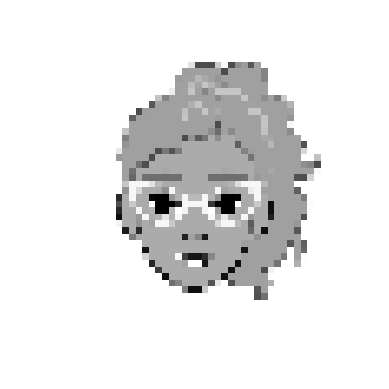

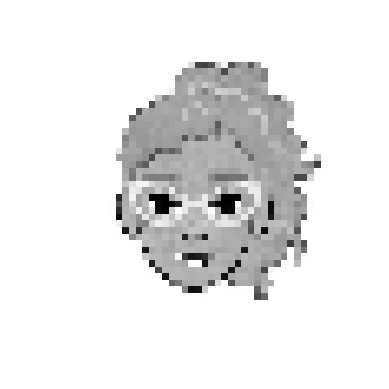

In [30]:
visualize.plot_img_original_generated(model=model,num_img=20,test_ds=test_ds)

In [ ]:
visualize.plot_latent_images(model=model, num_images_x= 20, epoch=2, stan_des= 1, mean=0)

ValueError: Input 0 of layer "sequential_5" is incompatible with the layer: expected shape=(None, 90), found shape=(1, 2)